Given that the target is 300, there are two ways to approach this problem:

1. Look at those training examples whose Target is close to 300.
2. Scale the training examples such that the Target is 300 for the entire dataset.

In [179]:
#Question 1

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Cricket.csv")
data = data[data['Innings'] == 2]
#print(data.columns)

data = data[['Match','Target.Score','Over','Total.Runs','Run.Rate','At.Bat','Winning.Team','Wickets.in.Hand']]

#1st approach
data1 = data[abs((data['Target.Score']-300)/300) < 0.01] 
data1 = data1[data1['Over'] == 10]
data_win1 = data1[data1['At.Bat'] == data1['Winning.Team']]
data_loss1 = data1[data1['At.Bat'] != data1['Winning.Team']]

#2nd approach
data2 = data
data2['Run.Rate'] = data2['Run.Rate']*300/data2['Target.Score']
data2['Target.Score'] = 300
data2 = data2[data2['Over'] == 10]
data_win2 = data2[data2['At.Bat'] == data2['Winning.Team']]
data_loss2 = data2[data2['At.Bat'] != data2['Winning.Team']]

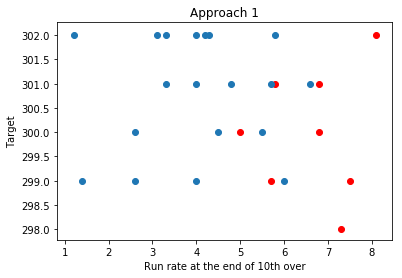

count    8.000000
mean     6.625000
std      1.044373
min      5.000000
25%      5.775000
50%      6.800000
75%      7.350000
max      8.100000
Name: Run.Rate, dtype: float64
count    19.000000
mean      4.047368
std       1.498654
min       1.200000
25%       3.200000
50%       4.000000
75%       5.150000
max       6.600000
Name: Run.Rate, dtype: float64


In [180]:
#Question 1 (cont ...)

plt.scatter(data_win1['Run.Rate'],data_win1['Target.Score'],c= 'r')
plt.scatter(data_loss1['Run.Rate'],data_loss1['Target.Score'])
plt.xlabel('Run rate at the end of 10th over')
plt.ylabel('Target')
plt.title('Approach 1')
plt.show()

print(data_win1['Run.Rate'].describe())
print(data_loss1['Run.Rate'].describe())

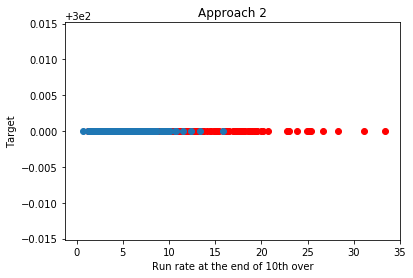

count    734.000000
mean       8.120064
std        4.031448
min        1.282051
25%        5.645717
50%        7.133507
75%        9.300940
max       33.333333
Name: Run.Rate, dtype: float64
count    684.000000
mean       4.817572
std        1.685386
min        0.724138
25%        3.734163
50%        4.622507
75%        5.626796
max       15.828221
Name: Run.Rate, dtype: float64


In [181]:
#Question 1 (cont ...)

plt.scatter(data_win2['Run.Rate'],data_win2['Target.Score'],c= 'r')
plt.scatter(data_loss2['Run.Rate'],data_loss2['Target.Score'])
plt.xlabel('Run rate at the end of 10th over')
plt.ylabel('Target')
plt.title('Approach 2')
plt.show()

print(data_win2['Run.Rate'].describe())
print(data_loss2['Run.Rate'].describe())

Approach 1:
Run rate (RR) at the end of 10 overs:
1. Winning team: 
    Mean = 6.625000 , Standard deviation = 1.044373
2. Losing team:
    Mean = 4.047368 , Standard deviation = 1.498654

Approach 2:
Run rate (RR) at the end of 10 overs:
1. Winning team: 
    Mean = 8.120064, Standard deviation = 4.031448
2. Losing team: 
    Mean = 4.817572, Standard deviation = 1.685386

By considering *mean_RR + 2 x std_dev_RR* of the losing team (of both the approaches), the best strategy for Indian team is to have a RR > 8 at the end of 10th over.

110 1418


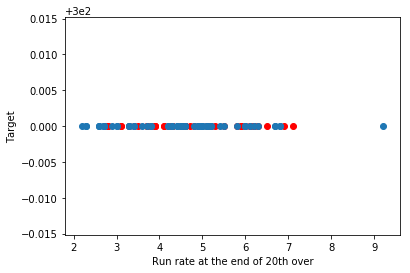

count    46.000000
mean      4.689130
std       1.153011
min       2.700000
25%       3.900000
50%       4.600000
75%       5.725000
max       7.100000
Name: Run.Rate, dtype: float64
count    64.000000
mean      4.506250
std       1.384939
min       2.200000
25%       3.375000
50%       4.600000
75%       5.125000
max       9.200000
Name: Run.Rate, dtype: float64


In [182]:
#Question 2

#Taking scaled data from Approach 2

data2 = data
data2['Run.Rate'] = data2['Run.Rate']*300/data2['Target.Score']
data2['Target.Score'] = 300

data3 = data2[data2['Over'] == 20]
data2 = data2[data2['Over'] == 10]

data4 =  data2[abs((data2['Total.Runs']/(10 - data2['Wickets.in.Hand']) - 25)/25) > 0.1]
Matches = list(data4['Match'].values)

# We are discarding matches where the Runs per wicket was not (approximately) equal to 25 (50/2) 

data2.set_index('Match', inplace = True)
data3.set_index('Match', inplace = True)

for i in data3.index:
    if i in Matches:
        data3 = data3.drop(i)

print(len(data3),len(data2))
for i in data3.index:
    data3.loc[i,'Run.Rate'] = (data3.loc[i,'Total.Runs'] - data2.loc[i,'Total.Runs'])/10 

data_win3 = data3[data3['At.Bat'] == data3['Winning.Team']]
data_loss3 = data3[data3['At.Bat'] != data3['Winning.Team']]

plt.scatter(data_win3['Run.Rate'],data_win3['Target.Score'],c= 'r')
plt.scatter(data_loss3['Run.Rate'],data_loss3['Target.Score'])
plt.xlabel('Run rate at the end of 20th over')
plt.ylabel('Target')

plt.show()

print(data_win3['Run.Rate'].describe())
print(data_loss3['Run.Rate'].describe())

Average run rate (RR) in 10-20 overs:
Winning team: Mean = 4.689130, Standard deviation = 1.153011
Losing team: Mean = 4.506250, Standard deviation = 1.384939

A clear conclusion cannot be made from the data given above.

But the best strategy for Indian team will be to maintain a RR > 7.3 (By considering *mean_RR + 2 x std_dev_RR* of the losing team) at the end of 10th over.